In [15]:
import pandas as pd
import numpy as np
import random;import copy
import sys;import time
import matplotlib.pyplot as plt

In [16]:
genomesize = 500
gens = 100
popsize = 100
DNAcharacters = 'TGCA'

In [17]:
times = []
sizes = []
ave_scores = []
max_scores = []
max_iterations = []
ave_mutations = []

In [18]:
def crossover_rate():
        random.seed(17)
        crossover_rate = random.uniform(0,9)
        return crossover_rate
    
    
def mutation_rate():
        #random.seed(17)
        mutation_base = random.uniform(3,10)
        mutation_pressure = random.uniform(1,2)
        mutation_rate = mutation_base - mutation_pressure
        #mutation_rate2 = random.uniform(1,(gens/2)/i)
        return mutation_rate

In [19]:
class individual:
    def __init__(self):
        self.fitness = 0
        self.genome = []
        random.seed(17)
        for i in range(0,genomesize):
            self.genome.append(random.choice(DNAcharacters))
        self.calcFitness()

    def print(self):
        for c in self.genome:
            print(c,end = "")
        print("  fitness:" + str(self.fitness))

    def calcFitness(self):
        self.fitness = 0
        for c in self.genome:
            if c == 'T':
                self.fitness += 1
    
    def calcFitness2(self):
        #total = len(self.genome)
        self.fitness = 0
        for i in range(len(self.genome)-1):
            if i + 1 < len(self.genome) and self.genome[i] == 'C' and self.genome[i+1] == 'G':
                self.fitness += 1
        return self.fitness/popsize
    
    def mutation(self,mutation_rate):
        for i in range(0,genomesize):
            if(random.uniform(0,100) < mutation_rate):
                self.genome[i] = random.choice(DNAcharacters)
                #mutations.append(mutation_rate)
        self.calcFitness()

    def copy(self,source):
        self.fitness = source.fitness
        for i in range(0,genomesize):
            self.genome[i] = source.genome[i]

class population:
    def __init__(self):  
        self.avg_fitness = 0
        self.the_pop = []
        for i in range(0,popsize):
            self.the_pop.append(individual())

    def calcstats(self):
        self.avg_fitness = 0
        for i in self.the_pop:
            self.avg_fitness += i.fitness
        self.avg_fitness /= popsize
        
        
    def generationalElite(self,mutation_rate):
        tempPop = population()
        for i in range(0,popsize,2):
            self.the_pop.sort(key=lambda x: x.fitness, reverse=True)
            parent1 = 0 
            parent2 = 1
            tempPop.the_pop[i].copy(self.the_pop[parent1])
            tempPop.the_pop[i+1].copy(self.the_pop[parent2])
            tempPop.uniform_crossover(i,i+1)
            tempPop.the_pop[i].mutation(mutation_rate)
            tempPop.the_pop[i+1].mutation(mutation_rate)
        for i in range(0,popsize):
            self.the_pop[i].copy(tempPop.the_pop[i])
        self.calcstats()
        
    def generational1(self,mutation_rate):  # tournament + uniform crossover
        tempPop = population()
        for i in range(0,popsize,2):
            parent1 = self.tournament()
            parent2 = self.tournament()  
            tempPop.the_pop[i].copy(self.the_pop[parent1])
            tempPop.the_pop[i+1].copy(self.the_pop[parent2])
            tempPop.uniform_crossover(i,i+1)
            tempPop.the_pop[i].mutation(mutation_rate)
            tempPop.the_pop[i+1].mutation(mutation_rate)
        for i in range(0,popsize):
            self.the_pop[i].copy(tempPop.the_pop[i])
        self.calcstats()
        
    def generational2(self,mutation_rate): # tournament + onepoint crossover
        tempPop = population()
        for i in range(0,popsize,2):
            parent1 = self.tournament()
            parent2 = self.tournament()  
            tempPop.the_pop[i].copy(self.the_pop[parent1])
            tempPop.the_pop[i+1].copy(self.the_pop[parent2])
            tempPop.onepoint_crossover(i,i+1)
            tempPop.the_pop[i].mutation(mutation_rate)
            tempPop.the_pop[i+1].mutation(mutation_rate)
        for i in range(0,popsize):
            self.the_pop[i].copy(tempPop.the_pop[i])
        self.calcstats()
        
        
    def generational3(self,mutation_rate): # tournament + twopoint crossover
        tempPop = population()
        for i in range(0,popsize,2):
            parent1 = self.tournament()
            parent2 = self.tournament()  
            tempPop.the_pop[i].copy(self.the_pop[parent1])
            tempPop.the_pop[i+1].copy(self.the_pop[parent2])
            tempPop.twopoint_crossover(i,i+1)
            tempPop.the_pop[i].mutation(mutation_rate)
            tempPop.the_pop[i+1].mutation(mutation_rate)
        for i in range(0,popsize):
            self.the_pop[i].copy(tempPop.the_pop[i])
        self.calcstats()
        
        
    def generational4(self,mutation_rate):
        tempPop = population()
        for i in range(0,popsize,2):
            parent1 = self.roulette()
            parent2 = self.roulette()  
            tempPop.the_pop[i].copy(self.the_pop[parent1])
            tempPop.the_pop[i+1].copy(self.the_pop[parent2])
            tempPop.twopoint_crossover(i,i+1)
            tempPop.the_pop[i].mutation(mutation_rate)
            tempPop.the_pop[i+1].mutation(mutation_rate)
        for i in range(0,popsize):
            self.the_pop[i].copy(tempPop.the_pop[i])
        self.calcstats()

    def tournament(self):
        tourn_size = 2
        best_so_far = random.randint(0,popsize-1)
        best_fitness = self.the_pop[best_so_far].fitness
        for i in range(0,tourn_size - 1):
            current = random.randint(0,popsize-1)
            current_fit = self.the_pop[current].fitness
            if(current_fit > best_fitness):
                best_so_far = current
                best_fitness = current_fit
        return best_so_far
    
    def roulette(self):
        fit_values = [individual.fitness for individual in self.the_pop]
        max_fit = max(fit_values)
        probs = [fit/max_fit for fit in fit_values]
        U = random.uniform(0, 1)
        C = 0
        for i, prob in enumerate(probs):
            C += prob
            if C > U:
                return i
        #return len(self.the_pop) - 1
        return popsize-1

    
    def uniform_crossover(self,p1,p2):
        crossover_rate = random.uniform(0,9)
        for j in range(0,genomesize):
            if random.randint(0,100) < crossover_rate:
                temp = self.the_pop[p1].genome[j]
                self.the_pop[p1].genome[j] = self.the_pop[p2].genome[j]
                self.the_pop[p2].genome[j] = temp
    
    def crossover(self, parent1, parent2):
        child = individual()
        pos = random.randint(0, len(parent1.genome))
        child.genome = parent1.genome[:pos] + parent2.genome[pos:]
        return child
    
    def onepoint_crossover(self,p1,p2):
        crossover_point = random.randint(0,genomesize)
        for j in range(crossover_point, genomesize):
            temp = self.the_pop[p1].genome[j]
            self.the_pop[p1].genome[j] = self.the_pop[p2].genome[j]
            self.the_pop[p2].genome[j] = temp
    
    def twopoint_crossover(self,p1,p2):
        position1 = random.randint(0,genomesize)
        position2 = random.randint(0,genomesize)
        for j in range(position1, position2):
            temp = self.the_pop[p1].genome[j]
            self.the_pop[p1].genome[j] = self.the_pop[p2].genome[j]
            self.the_pop[p2].genome[j] = temp

In [20]:
mutations1 = []
g1=[]
ind=[]
p = population()


# experiment engine ********************
start_time = time.time()
for i in range (1,gens):
    mutate = mutation_rate()
    mutations1.append(mutate*10)
    ind.append(i)
    p.generational1(mutate)
    g1.append(p.avg_fitness) 
end_time = time.time()
#****************************************


times.append(end_time - start_time)
sizes.append(sys.getsizeof(g1))
max_scores.append(max(g1))
max_iterations.append(g1.index(max(g1)))
ave_scores.append(np.mean(g1))
ave_mutations.append(np.mean(mutations1))

print("Mutation max:",np.round(max(mutations1)))
print("Mutation average:",np.round(np.mean(mutations1)))

print("Max Fitness Score for Tourament w/ Uniform Crossover: ",max(g1))
#print("Max Fitness Score2:",max(max_scores1))

print("Time elapsed: ", np.round(end_time - start_time))
print("g1 size in bytes: ", sys.getsizeof(g1))
print("Maximum score was attained at iteration: ", g1.index(max(g1)))

Mutation max: 86.0
Mutation average: 53.0
Max Fitness Score for Tourament w/ Uniform Crossover:  192.31
Time elapsed:  6.0
g1 size in bytes:  920
Maximum score was attained at iteration:  98


In [21]:
max_iterations

[98]

In [22]:
mutations2 = []
max_iterations2 = []
g2=[]
ind=[]
p = population()


# experiment engine ********************
start_time = time.time()
for i in range (1,gens):
    mutate = mutation_rate()
    mutations2.append(mutate*10)
    ind.append(i)
    p.generational2(mutate)
    g2.append(p.avg_fitness) 
end_time = time.time()
#****************************************


times.append(end_time - start_time)
sizes.append(sys.getsizeof(g2))
max_scores.append(max(g2))
max_iterations.append(g2.index(max(g2)))
ave_scores.append(np.mean(g2))
ave_mutations.append(np.mean(mutations2))

print("Mutation max:",max(mutations2))
print("Mutation average:",np.mean(mutations2))

print("Max Fitness Score:",max(g2))
#print("Max Fitness Score2:",max(max_scores1))

print("Time elapsed: ", end_time - start_time)
print("g1 size in bytes: ", sys.getsizeof(g2))
print("Maximum score was attained at iteration: ", g2.index(max(g2)))

Mutation max: 86.03113983105301
Mutation average: 51.448847385096535
Max Fitness Score: 205.91
Time elapsed:  4.982014417648315
g1 size in bytes:  920
Maximum score was attained at iteration:  68


In [23]:
mutations3 = []
max_iterations3 = []
g3=[]
ind=[]
p = population()


# experiment engine ********************
start_time = time.time()
for i in range (1,gens):
    mutate = mutation_rate()
    mutations3.append(mutate*10)
    ind.append(i)
    p.generational3(mutate)
    g3.append(p.avg_fitness) 
end_time = time.time()
#****************************************


times.append(end_time - start_time)
sizes.append(sys.getsizeof(g3))
max_scores.append(max(g3))
max_iterations.append(g3.index(max(g3)))
ave_scores.append(np.mean(g3))
ave_mutations.append(np.mean(mutations3))


print("Mutation max:",max(mutations3))
print("Mutation average:",np.mean(mutations3))

print("Max Fitness Score:",max(g3))
#print("Max Fitness Score2:",max(max_scores1))

print("Time elapsed: ", end_time - start_time)
print("g1 size in bytes: ", sys.getsizeof(g3))
print("Maximum score was attained at iteration: ", g3.index(max(g3)))

Mutation max: 83.07979243694717
Mutation average: 59.28540192357663
Max Fitness Score: 187.71
Time elapsed:  4.75065016746521
g1 size in bytes:  920
Maximum score was attained at iteration:  81


In [ ]:
mutations4 = []
max_iterations4 = []
g4=[]
ind=[]
p = population()


# experiment engine ********************
start_time = time.time()
for i in range (1,gens):
    mutate = mutation_rate()
    mutations4.append(mutate)
    ind.append(i)
    p.generational4(mutate)
    g4.append(p.avg_fitness) 
end_time = time.time()
#****************************************


times.append(end_time - start_time)
sizes.append(sys.getsizeof(g4))


print("Mutation max:",max(mutations4))
print("Mutation average:",np.mean(mutations4))

print("Max Fitness Score:",max(g4))
#print("Max Fitness Score2:",max(max_scores1))

print("Time elapsed: ", end_time - start_time)
print("g1 size in bytes: ", sys.getsizeof(g4))
print("Maximum score was attained at iteration: ", g4.index(max(g4)))

In [ ]:
mutations5 = []
max_iterations5 = []
g5=[]
ind=[]
p = population()


# experiment engine ********************
start_time = time.time()
for i in range (1,gens):
    mutate = mutation_rate()
    mutations5.append(mutate)
    ind.append(i)
    p.generationalElite(mutate)
    g5.append(p.avg_fitness) 
end_time = time.time()
#****************************************


times.append(end_time - start_time)
sizes.append(sys.getsizeof(g5))


print("Mutation max:",max(mutations5))
print("Mutation average:",np.mean(mutations4))

print("Max Fitness Score:",max(g5))
#print("Max Fitness Score2:",max(max_scores1))

print("Time elapsed: ", end_time - start_time)
print("g1 size in bytes: ", sys.getsizeof(g5))
print("Maximum score was attained at iteration: ", g5.index(max(g5)))

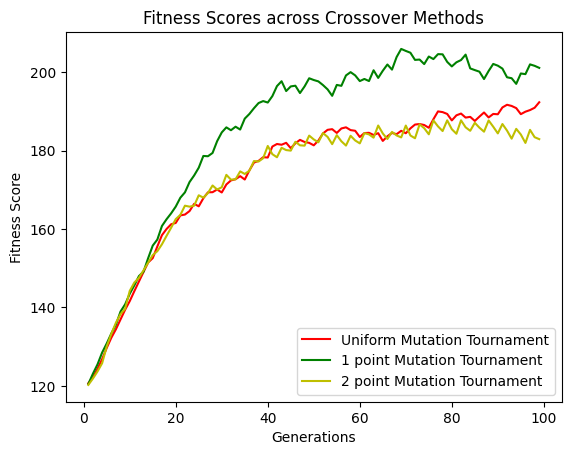

In [24]:
plt.plot(ind, g1, label='Uniform Mutation Tournament', color='r')
plt.plot(ind, g2, label='1 point Mutation Tournament', color='g')
plt.plot(ind, g3, label='2 point Mutation Tournament', color='y')
#plt.plot(ind, g4, label='Elite w/Uniform Crossover', color='b')
#plt.plot(ind, g5, label='Roulette Wheel w/', color='orange')
plt.legend()
plt.title("Fitness Scores across Crossover Methods")
plt.xlabel("Generations")
plt.ylabel("Fitness Score")
plt.show()

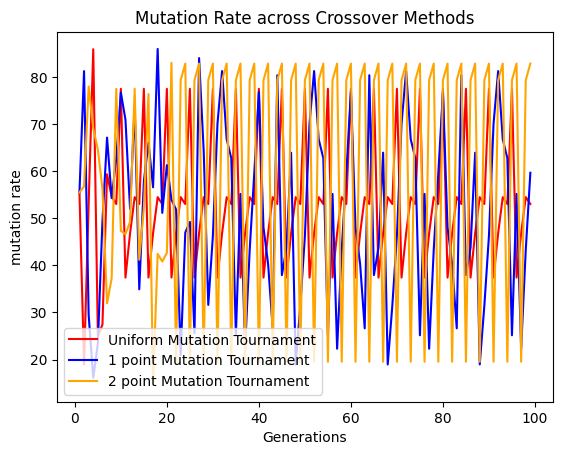

In [25]:

plt.plot(ind, mutations1, label='Uniform Mutation Tournament', color='r')
plt.plot(ind, mutations2, label='1 point Mutation Tournament', color='b')
plt.plot(ind, mutations3, label='2 point Mutation Tournament', color='orange')
#plt.plot(ind, g4, label='Elite w/Uniform Crossover', color='b')
#plt.plot(ind, g5, label='Roulette Wheel w/', color='orange')
plt.legend()
plt.title("Mutation Rate across Crossover Methods")
plt.xlabel("Generations")
plt.ylabel("mutation rate")
plt.show()

In [26]:
methods = ['Uniform crossover','1-point crossover','2-point crossover']
df = pd.DataFrame(list(zip(methods, ave_mutations, ave_scores, max_scores, times, max_iterations)), columns = ['Method', 'mean mutations','Mean Score', 'Max Score','Time (sec)', 'Max @ Iter'])
df.style.set_caption('Selection Method Comparison')
df.style.set_table_styles([{'selector': 'th', 'props': [('border-bottom', '1px solid black')]}])

,Method,mean mutations,Mean Score,Max Score,Time (sec),Max @ Iter
0,Uniform crossover,53.355373,174.290707,192.310000,6.479761,98
1,1-point crossover,51.448847,185.127273,205.910000,4.982014,68
2,2-point crossover,59.285402,173.140404,187.710000,4.750650,81


# import pandas as pd
from IPython.display import display

methods = ['Uniform crossover','1-point crossover','2-point crossover']
max_scores = [0.98, 0.97, 0.95]
times = [200, 150, 170]
max_iterations = [100, 120, 110]

df = pd.DataFrame(list(zip(methods, max_scores, times, max_iterations)), columns = ['Method', 'Score', 'Time (sec)', 'Max @ Iter'])

def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

df.style.\
    set_caption('Selection Method Comparison').\
    set_table_styles([{'selector': 'th', 'props': [('border-bottom', '1px solid black')]}]).\
    set_precision(3).\
    apply(highlight_max, axis=0)

display(df)


In [ ]:
p = population()
p.the_pop[0].print()
p.the_pop[1].print()
p.onepoint_crossover(0,1)
p.the_pop[1].print()
p.the_pop[0].print()

In [ ]:
p = population()
p.the_pop[0].print()
p.the_pop[1].print()
p.uniform_crossover(0,1)
p.the_pop[1].print()
p.the_pop[0].print()

In [ ]:
for i in range(0,popsize):
    p.the_pop[i].print()
p.calcstats()
print(p.avg_fitness)

In [ ]:
p.generational()

In [ ]:
for i in range(0,popsize):
    p.the_pop[i].print()
p.calcstats()
print(p.avg_fitness)

In [ ]:
p2 = population()
for i in range(0,popsize):
    p2.the_pop[i].print()
p2.calcstats()
print(p2.avg_fitness)
for i in range (0,100):
    p2.generational()
    #print(p2.avg_fitness)
for i in range(0,popsize):
    p2.the_pop[i].print()
p2.calcstats()
print(p2.avg_fitness)